# IS362 - Assignment 13

Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository
here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the
data science community has made it a good dataset to use for comparative benchmarking. For example, if someone
was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data,
this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute
or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”
Your assignment is to
• First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to
look around a bit, but it’s there!
• Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column
that indicates edible or poisonous, the column that includes odor, and at least one other column of your
choosing.
• Add meaningful names for each column.
• Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might
become 0 and “p” might become 1. This is because your downstream processing in Project 4 using
scikit-learn requires that values be stored as numerics.
• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
• Include some text describing your preliminary conclusions about whether either of the other columns
could be helpful in predicting if a specific mushroom is edible or poisonous.

Let's start with the module imports:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

Now we're going to create a data frame with the data we want to look at. Most important, we're looking at the first column that tells us whether the mushroom is edible or poisonous. In addition, we're going to look at the odor, the color of the cap, and the color of the gills. This information is stored in columns 3, 5, and 9, which we will rename appropriately to "Cap Color", "Odor", and "Gill Color".

In [15]:
mushroom_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,3,5,9], names=["Edible","Cap_Color","Odor","Gill_Color"])
mushroom_data.head()

,Edible,Cap_Color,Odor,Gill_Color
0,p,n,p,k
1,e,y,a,k
2,e,w,l,n
3,p,w,p,n
4,e,g,n,k


We can see here that the data is stored as letter values. We need data stored as numeric values instead, so we're going to have to change this. 

Here are the updates we're going to have to make:

Edible:
edible: e = 0
poisonous: p = 1

Cap Color:
brown: n = 0
buff: b = 1
cinnamon: c = 2
gray: g = 3
green: r = 4
pink: p = 5
purple: u = 6
red: e = 7
white: w = 8
yellow: y = 9

Odor:
almond: a = 0
anise: l
creosote: c = 2
fishy: y = 3
foul: f = 4
musty: m = 5
none: n = 6
pungent: p = 7
spicy: s = 8

Gill Color:
black: k = 0
brown: n = 1
buff: b = 2
chocolate: h = 3
gray: g = 4
green: r = 5
orange: o = 6
pink: p = 7
purple: u = 8
red: e = 9
white: w = 10
yellow: y = 11

In [16]:
mushroom_data.replace(to_replace={"Edible":{'p': 1, 'e': 0}}, inplace=True)
mushroom_data.replace(to_replace={"Cap_Color":{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
mushroom_data.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
mushroom_data.replace(to_replace={"Gill_Color":{'k':0, 'n':1, 'b':2, 'h':3, 'g':4, 'r':5, 'o':6, 'p':7, 'u':8, 'e':9, 'w':10, 'y':11}}, inplace=True)

Now let's take a peek at our handiwork:

In [17]:
mushroom_data.head()

,Edible,Cap_Color,Odor,Gill_Color
0,1,0,7,0
1,0,9,0,0
2,0,8,1,1
3,1,8,7,1
4,0,3,6,0


Finally, we want to examine this data in graphical form:

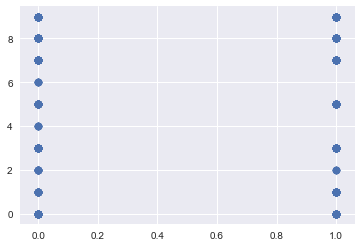

In [9]:
x = mushroom_data["Edible"].values
y = mushroom_data["Cap_Color"].values

plt.scatter(x,y)

Now, as we recall, 0 means the mushroom is edible, 1 means its poisonous. The numerical values on the y axis determine the color of the cap. Based on this plot, we can see that although edible mushrooms come in every color cap, there are no poisonous mushrooms with a cap color of 4 (green) or 6 (purple).

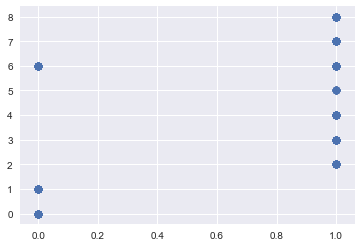

In [18]:
x = mushroom_data["Edible"].values
y = mushroom_data["Odor"].values

plt.scatter(x,y)

This graph is a bit more helpful. While mushrooms with no odor (6) could be either edible or poisonous, mushrooms with an almond or anise odor (0 or 1) will be edible. All other mushrooms are poisonous. (Most of the other smells described seem unpleasant anyway... I don't think we're missing out)

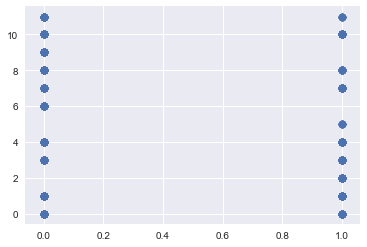

In [19]:
x = mushroom_data["Edible"].values
y = mushroom_data["Gill_Color"].values

plt.scatter(x,y)

Finally, we're looking at gill color. Here we can determine that mushrooms whose gill color is 6 (orange) or or 9 (red) are not going to be poisonous, and that mushrooms with a gill color of 3 (chocolate) or 5 (green) will always be poisonous, as there are no edible mushrooms with that color. 

Odor seems to be the most helpful of the three criteria analyzed, as it has the least overlap. Looking at the colors of the caps and gills of the mushrooms only provides a minimal amount of help, because there is a lot of overlap between what is poisonous and what is edible - many colors can have mushrooms from either category.